# Build Simple Mushroom Classifier

Load Images for 100 Taxa with 100 Images Each

In [2]:
from pathlib import Path
from fastai.vision.all import *
MO_URL = "https://images.mushroomobserver.org/6_2023-04-09-105710.tgz"
path = untar_data(MO_URL)
fnames = get_image_files(path)

def label_func(x):
    dirname = x.parent.name
    return dirname

dls = ImageDataLoaders.from_path_func(path, fnames, label_func, item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

Show Me Some Mushrooms

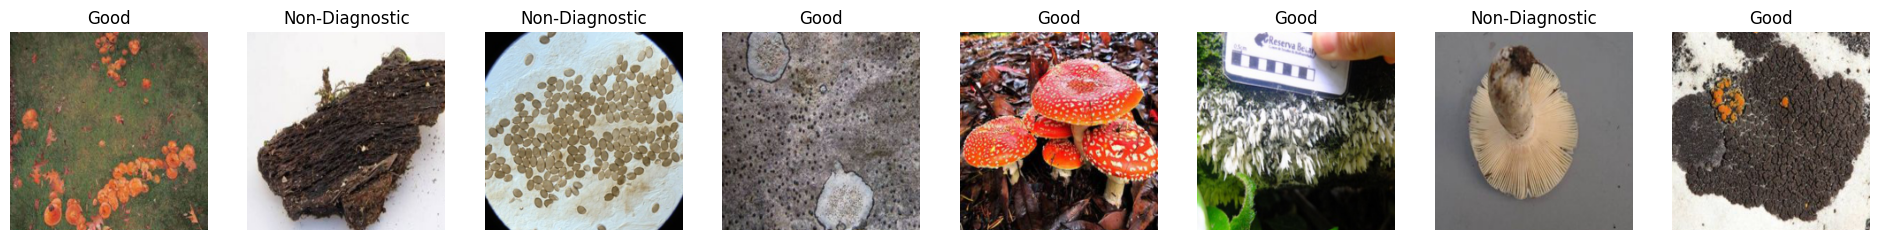

In [3]:
dls.valid.show_batch(max_n=8, nrows=1)

Show Me Some Names

In [4]:
dls.vocab

['Good', 'Non-Diagnostic']

(Re)run Training - Run this cell to start over with the current image set

In [5]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 168MB/s]


Look for Confusion

In [6]:
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused()

[('Non-Diagnostic', 'Good', 15), ('Good', 'Non-Diagnostic', 3)]

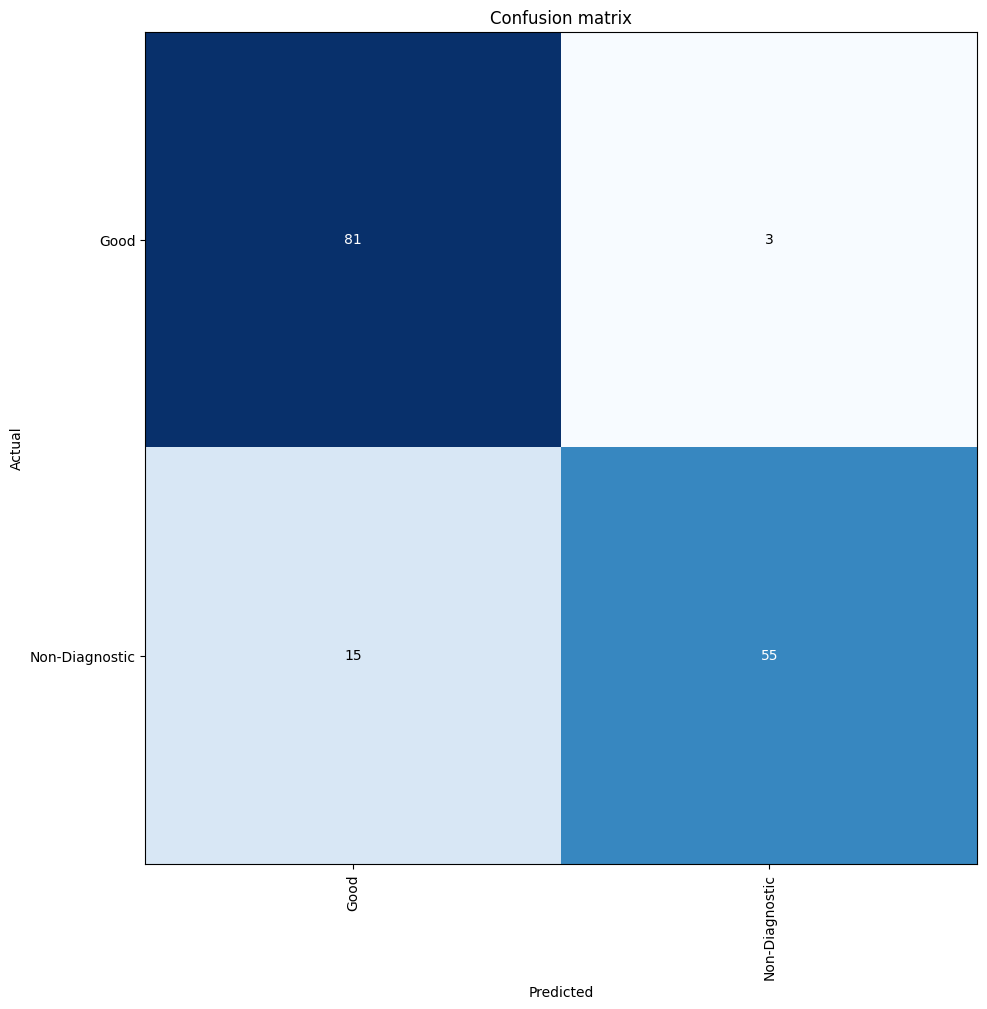

In [7]:
interp.plot_confusion_matrix(figsize=(10, 10))

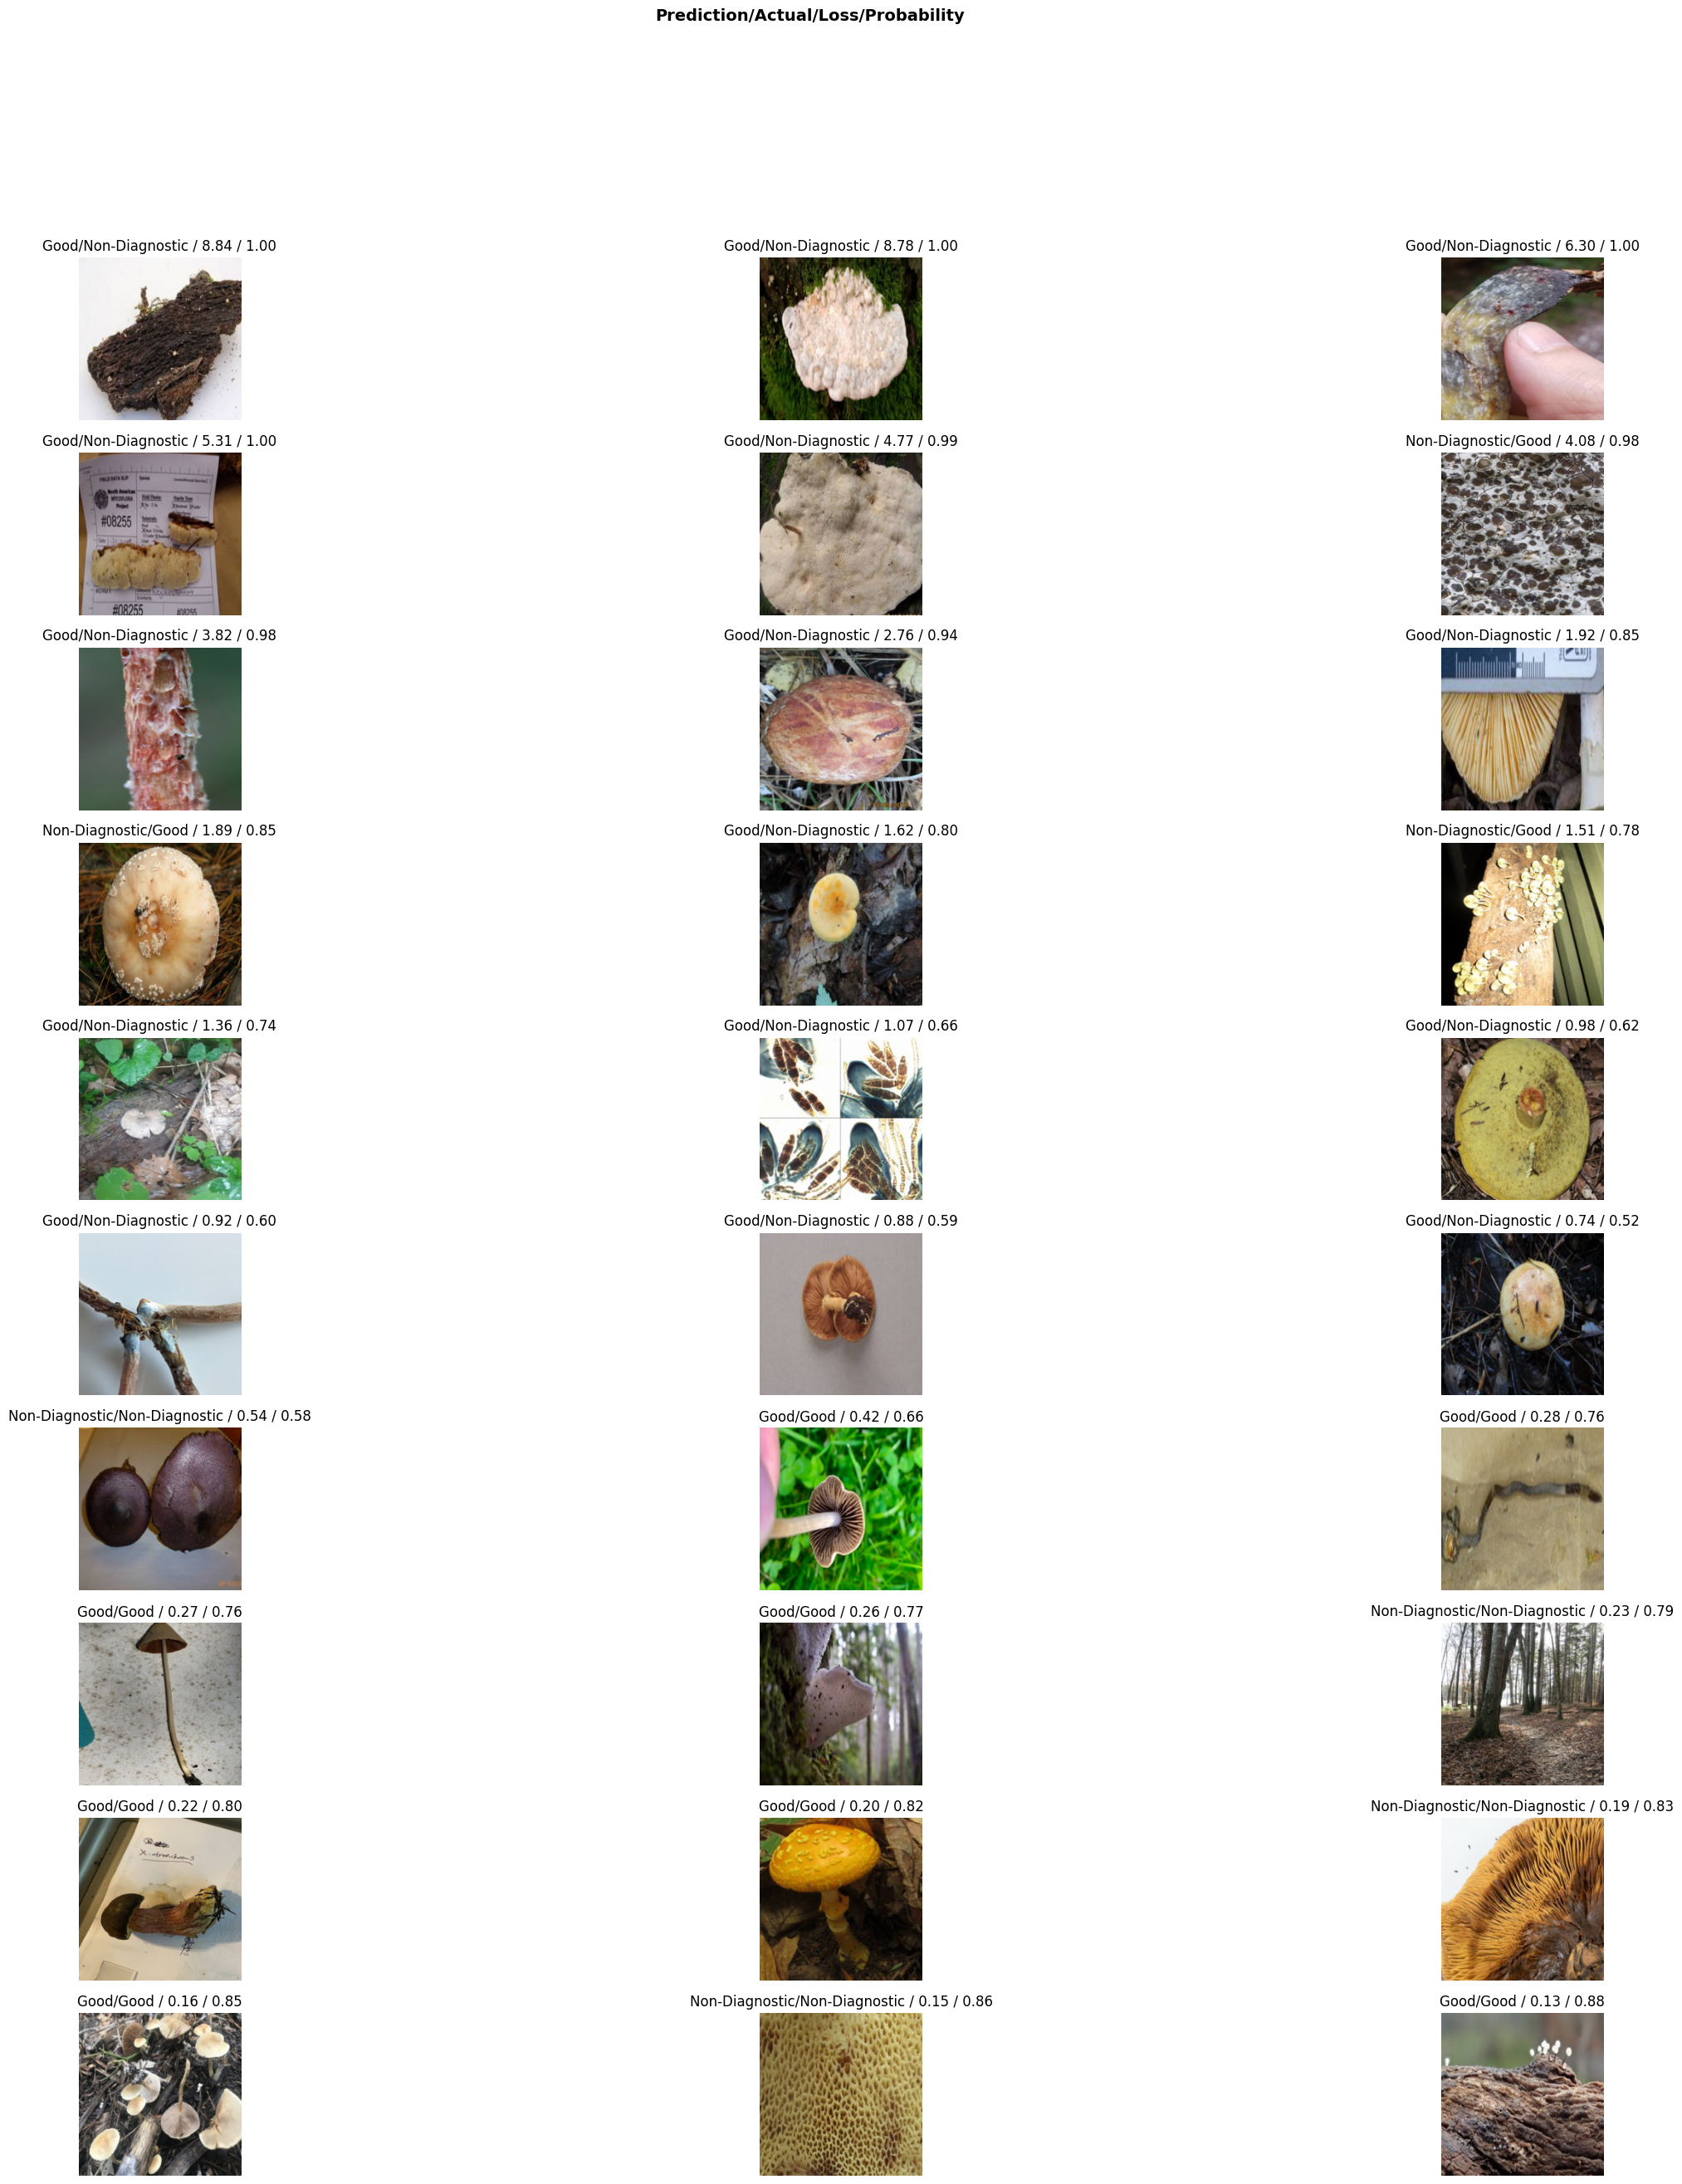

In [8]:
interp.plot_top_losses(30, nrows=10, figsize=(30, 30))

In [ ]:
from fastai.vision.widgets import *
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete(): print(f"https://mushroomobserver.org/image/show_image/{str(cleaner.fns[idx]).split('/')[-1].split('.')[0]}")

https://mushroomobserver.org/image/show_image/44707
https://mushroomobserver.org/image/show_image/251331
https://mushroomobserver.org/image/show_image/326458


Export the Model

In [18]:
learn.export()
model_path = learn.path / "export.pkl"
model_path

Path('/root/.fastai/data/6_2023-04-09-105710/export.pkl')

In [15]:
# Copy saved movel to Google Drive so it can be saved and potentially downloaded and used elsewhere
from google.colab import drive
drive.mount('/content/drive')
!cp $model_path /content/drive/MyDrive

Mounted at /content/drive
